<h1 style='text-align: center; max-width: 800px'>Data extraction and Data visualization with Pandas, Matplotlib, Seaborn, Bohek</h1>

In [31]:
import os
import psycopg2
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

initial_data='./initial_data.csv'
region_data = './region.csv'

<p>Created decorator that will wrap all further function with connection to database method</p>

In [32]:

def make_queries(func):
    def wrapper():
        ''' Open connection to DB '''
        try:
            connection = psycopg2.connect(
                host=os.getenv('host'),
                port=os.getenv('port'),
                user=os.getenv('user'),
                password=os.getenv('password'),
                dbname=os.getenv('db_name')
            )

            connection.autocommit = True
    
            ''' Extract and handle data '''
        
            func(connection)
        
            ''' Except the err mes and close connection '''
        
        except Exception as _ex:
            print(_ex)

        finally:
            connection.close
            
    return wrapper

<p>Extract data from DB and print the output</p>

In [41]:
@make_queries
def show_all(*args):
    with args[0].cursor() as cursor:
        cursor.execute('select * from employment')
        data = pd.DataFrame(cursor.fetchall())
        print(data)
            
        
show_all()

        0                 1     2       3      4      5      6      7      8   \
0     1688  Hong Kong, China  2008    3525    389    263    668    487    587   
1     3694            Sweden  2013    4697    272   1211    816    282    961   
2      258        Bangladesh  2004   50260    224   1488    730   1084   9086   
3     4242          Viet Nam  2009   49514    477   2301   1886    812   7708   
4     1125           Ecuador  2020    8305     81    660    387    284   1842   
...    ...               ...   ...     ...    ...    ...    ...    ...    ...   
4342  4314            Zambia  2012    5477     56    264    108     41    593   
4343  4317            Zambia  2015    6124     65    315    124     46    687   
4344  4112     United States  2017  156751  16612  34629  22422  15764  28861   
4345  4113     United States  2018  158025  16839  35372  22672  15678  29022   
4346  4114     United States  2019  158736  17002  35984  22822  15532  29119   

         9     10     11  1

In [46]:
import matplotlib.pyplot as plt

                               0        1     2
0             Arab States Region    25612  2000
1             Arab States Region    26300  2001
2             Arab States Region    27126  2002
3             Arab States Region    28211  2003
4             Arab States Region    29348  2004
..                           ...      ...   ...
133  Asia and the Pacific Region  1903677  2018
134  Asia and the Pacific Region  1915829  2019
135  Asia and the Pacific Region  1927804  2020
136  Asia and the Pacific Region  1938625  2021
137  Asia and the Pacific Region  1949578  2022

[138 rows x 3 columns]


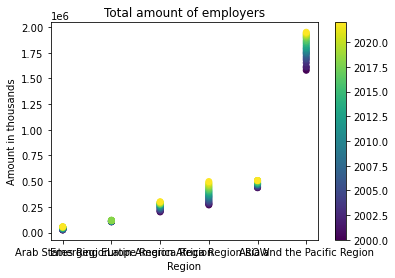

In [47]:
@make_queries
def scatter_chart(*args):
    with args[0].cursor() as cursor:

        '''Scatter chart'''
        cursor.execute('select region.region, sum(total), year from employment inner join region on employment.region_id=region.id group by region.region, year order by sum(total)')

        data = pd.DataFrame(cursor.fetchall())
        print(data)


        plt.scatter(data[0], data[1], c=data[2])
        plt.title('Total amount of employers')
        plt.xlabel('Region')
        plt.ylabel('Amount in thousands')
        plt.colorbar()
        plt.show()
        
scatter_chart()

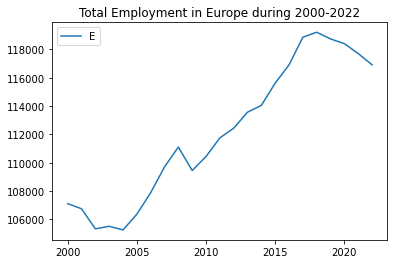

In [57]:
@make_queries
def line_chart(*args):
    with args[0].cursor() as cursor:
        cursor.execute("select region.region, sum(total), year from employment inner join region on employment.region_id=region.id group by year, region.region having region.region='Emerging Europe Region' order by year")

        data = pd.DataFrame(cursor.fetchall())
        plt.plot(data[2], data[1])
        plt.title('Total Employment in Europe during 2000-2022')
        plt.legend('Europe')
        plt.show()
        
line_chart()

                 0       1     2
0    Africa Region  268915  2000
1    Africa Region  276243  2001
2    Africa Region  283068  2002
3    Africa Region  291140  2003
4    Africa Region  300850  2004
..             ...     ...   ...
133            ROW  503314  2018
134            ROW  505211  2019
135            ROW  506324  2020
136            ROW  506452  2021
137            ROW  506757  2022

[138 rows x 3 columns]


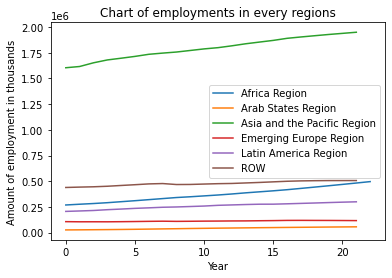

In [62]:
@make_queries
def mutiple_line_chart(*args):
    with args[0].cursor() as cursor:
        '''Line chart'''
        cursor.execute('select region.region, sum(total), year from employment inner join region on employment.region_id=region.id group by region.region, year order by region.region, year')

        data = pd.DataFrame(cursor.fetchall())
        print(data)

        region = data[0][0]
        l, legend = list(), list()
        for row in range(len(data[0])):
            if region != data[0][row]:
                legend.append(region)
                region = data[0][row]
                plt.plot(l)
                l = list()
            else:
                l.append(data[1][row])
        plt.plot(l), legend.append(region)
            
        plt.title('Chart of employments in every regions')
        plt.ylabel('Amount of employment in thousands')
        plt.xlabel('Year')
        plt.legend(legend)
        plt.show()
        
mutiple_line_chart()

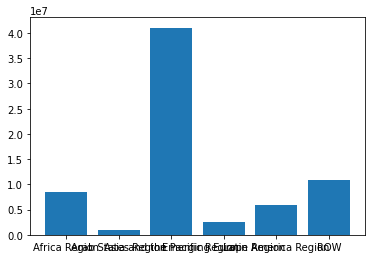

In [64]:
@make_queries
def bar_chart(*args):
    with args[0].cursor() as cursor:
        cursor.execute('select region.region, sum(total)\
                        from employment inner join region \
                        on employment.region_id=region.id\
                        group by region.region \
                        order by region.region')

        data = pd.DataFrame(cursor.fetchall())
        plt.bar(data[0], data[1])
        plt.show()

        
bar_chart()

In [124]:
import seaborn as sns

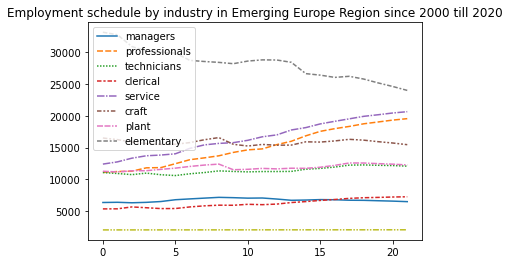

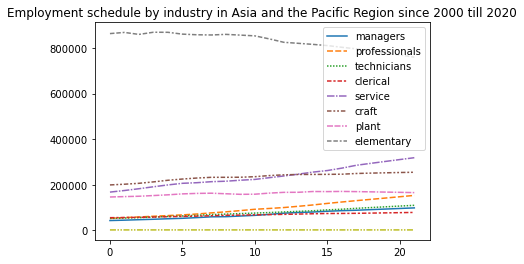

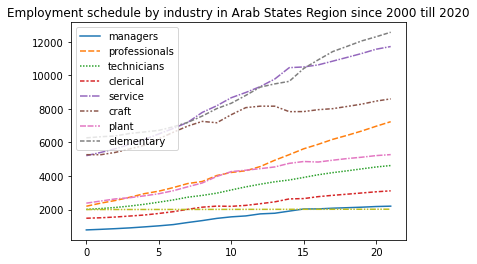

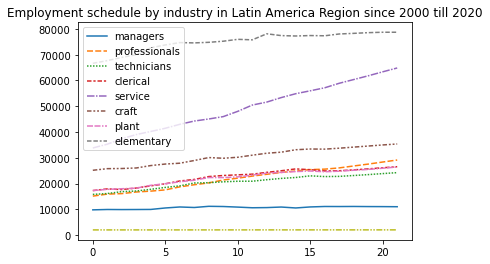

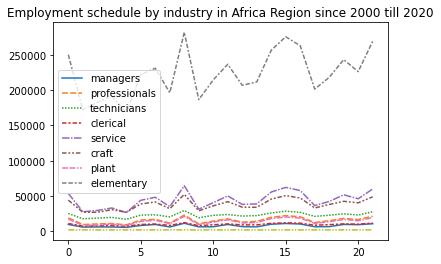

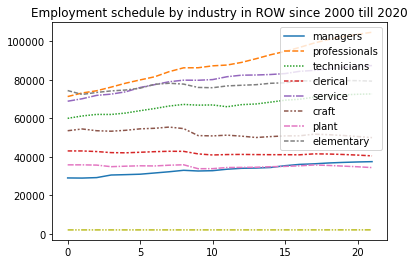

In [143]:
@make_queries
def sns_line_plot(*args):
    with args[0].cursor() as cursor:
        cursor.execute('select * from region;')
        for region in cursor.fetchall():
            cursor.execute(f'select region.region, sum(managers), sum(professionals),\
                            sum(technicians), sum(clerical), sum(service),\
                            sum(craft), sum(plant),sum(elementary), year\
                            from employment\
                            inner join region\
                            on employment.region_id=region.id\
                            group by region.region, year, region_id\
                            having region_id={region[0]}')
            
            data = pd.DataFrame(cursor.fetchall())

            sns.lineplot(data=data[0:-1])
            plt.legend(['managers', 'professionals', 'technicians',
                        'clerical', 'service', 'craft', 'plant', 'elementary'])
            plt.title(f'Employment schedule by industry in {region[1]} since 2000 till 2020')
            plt.show()
            
sns_line_plot()

module 'matplotlib.pyplot' has no attribute 'xaxic'


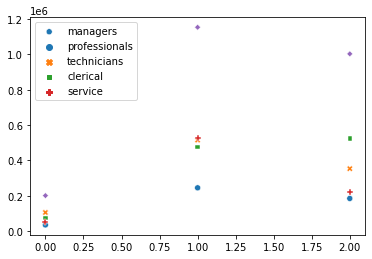

In [167]:
@make_queries
def sns_scatter_plot(*args):
    with args[0].cursor() as cursor:
        cursor.execute(f'select region.region, sum(managers), sum(professionals),\
                        sum(technicians), sum(clerical), sum(service)\
                        from employment\
                        inner join region\
                        on employment.region_id=region.id\
                        group by region.region, region_id\
                        having region_id>4 and region_id<=14 and region_id!=8')

        data = pd.DataFrame(cursor.fetchall())
        sns.scatterplot(data=data)
        plt.legend(['managers', 'professionals', 'technicians',
                    'clerical', 'service'])
        plt.show()

sns_scatter_plot()

In [307]:
@make_queries
def bokeh_scatter_chart(*args):
    from bokeh.plotting import figure, output_file, show
    from bokeh.palettes import magma
    with args[0].cursor() as cursor:
        cursor.execute("select service, country\
                        from employment\
                        where region_id=4\
                        order by year;")

        data = pd.DataFrame(cursor.fetchall())
        print(data)
        chart = figure(title = "Bohek")
        color = magma(len(data[0]) if len(data[0])<=256 else 256)
        chart.scatter([i for i in range(len(data[1]))], data[0], color=color)
        show(chart)

bokeh_scatter_chart()

        0                1
0      79  North Macedonia
1    2266          Ukraine
2     275          Croatia
3     412          Belarus
4     135           Latvia
..    ...              ...
524   178          Georgia
525   525           Serbia
526  1449          Romania
527   126         Slovenia
528   131           Latvia

[529 rows x 2 columns]


In [330]:
@make_queries
def bokeh_line_chart(*args):
    from bokeh.plotting import figure, output_file, show
    from bokeh.palettes import magma
    with args[0].cursor() as cursor:
        cursor.execute("select professionals, year\
                        from employment\
                        where country='Germany'\
                        order by year;")

        data = pd.DataFrame(cursor.fetchall())
        print(data)
        chart = figure(title = "Service in Germany since 2000")
        chart.line([2000 + i for i in range(len(data[1]))], data[0])
        show(chart)

bokeh_line_chart()

       0     1
0   5383  2000
1   5507  2001
2   5579  2002
3   5761  2003
4   5859  2004
5   6021  2005
6   6087  2006
7   6193  2007
8   6310  2008
9   6507  2009
10  6729  2010
11  6977  2011
12  6692  2012
13  6793  2013
14  6902  2014
15  7071  2015
16  7326  2016
17  7475  2017
18  7603  2018
19  7715  2019
20  7810  2020
21  7880  2021
22  7942  2022


In [345]:
@make_queries
def bokeh_bar_chart(*args):
    from bokeh.plotting import figure, output_file, show
    from bokeh.palettes import magma
    with args[0].cursor() as cursor:
        cursor.execute('select year, sum(total)\
                        from employment \
                        group by year\
                        order by year')

        data = pd.DataFrame(cursor.fetchall())
        print(data)
        chart = figure(title = "Service in Germany since 2000")
        chart.vbar(data[0], top=data[1])
        show(chart)

bokeh_bar_chart()

       0        1
0   2000  2618228
1   2001  2659074
2   2002  2685295
3   2003  2738285
4   2004  2789688
5   2005  2832477
6   2006  2877721
7   2007  2925123
8   2008  2959490
9   2009  2970926
10  2010  3002747
11  2011  3038084
12  2012  3073144
13  2013  3110580
14  2014  3151240
15  2015  3188796
16  2016  3224725
17  2017  3270329
18  2018  3305346
19  2019  3336899
20  2020  3368371
21  2021  3396964
22  2022  3425699


In [ ]:
'''Add new col region'''
# with connection.cursor() as cursor:
#     cursor.execute(
#         'SELECT DISTINCT country FROM employment;'
#     )
#     region_data = pd.read_csv(region_data)
#     data = pd.DataFrame(cursor.fetchall())

#     for country in data[0]:
#         country = country.replace("'", "''")
#         for region in region_data:
#             if region[0] != 'U':
#                 if (country in region_data[region].values or country + ' ' in region_data[region].values) and region != 'ALL Countries':
#                     cursor.execute(f"UPDATE employment SET region_id=reg_id.id\
#                         FROM(SELECT id FROM region WHERE region='{region}') as reg_id WHERE country='{country}';")
#                     print(country, region)




'''Create initial data'''
# with open(initial_data, newline='') as data:
#     csv_data = csv.reader(data, delimiter=',')

#     country = str()
#     with connection.cursor() as cursor:
#         for row in csv_data:
#             country = row[1].replace("'", "''").rstrip()
#             cursor.execute(
#                 f"INSERT INTO employment\
#                 VALUES ({id}, '{country}', {row[2]}, {row[3]}, {row[4]},\
#                     {row[5]}, {row[6]}, {row[7]}, {row[8]},\
#                         {row[9]}, {row[10]}, {row[11]});"
#             )
#             connection.commit()